In [10]:
import random
import numpy as np
from model import *
import torch
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

index_to_color = {0:'white',1: 'red', 2: 'green', 3: 'blue', 4: 'yellow', 5: 'purple',6:'black'}

def generate_data(batch_size=100):
    rand_index_list = np.array([sorted(np.random.choice(range(1, 20), 5, replace=False)) for _ in range(batch_size)])
    colors = np.random.choice(range(1,6), (batch_size,5))
    target = np.zeros((batch_size,25))
    target[:, 20:] = colors
    data = np.zeros((batch_size,25))
    data[np.arange(batch_size)[:, None], rand_index_list] = colors
    data[:, 20:] = 6
    return [data, target]

data = generate_data(batch_size=100)
print(data[0][0],data[1][0])

[0. 3. 0. 2. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 6. 6. 6. 6.
 6.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 2. 2. 2.
 2.]


  0%|          | 3/200001 [00:00<2:10:20, 25.57it/s]

Epoch 0: loss=1.6740089654922485


  3%|▎         | 5003/200001 [03:24<2:08:06, 25.37it/s]

Epoch 5000: loss=1.462764859199524


  5%|▌         | 10003/200001 [06:53<2:02:38, 25.82it/s]

Epoch 10000: loss=1.388455867767334


  8%|▊         | 15005/200001 [10:21<2:03:56, 24.88it/s]

Epoch 15000: loss=1.3602885007858276


 10%|█         | 20004/200001 [13:48<1:54:14, 26.26it/s]

Epoch 20000: loss=1.3309346437454224


 13%|█▎        | 25004/200001 [17:14<1:53:43, 25.64it/s]

Epoch 25000: loss=1.3197098970413208


 15%|█▌        | 30003/200001 [20:42<1:48:49, 26.03it/s]

Epoch 30000: loss=1.2990367412567139


 18%|█▊        | 35003/200001 [24:10<1:42:43, 26.77it/s]

Epoch 35000: loss=1.2874319553375244


 20%|██        | 40004/200001 [27:36<1:43:28, 25.77it/s]

Epoch 40000: loss=1.2798117399215698


 23%|██▎       | 45004/200001 [31:05<2:14:17, 19.24it/s]

Epoch 45000: loss=1.2761635780334473


 25%|██▌       | 50003/200001 [34:31<1:34:06, 26.56it/s]

Epoch 50000: loss=1.2762874364852905


 28%|██▊       | 55004/200001 [37:56<1:33:49, 25.76it/s]

Epoch 55000: loss=1.2741246223449707


 30%|███       | 60003/200001 [41:21<1:28:15, 26.43it/s]

Epoch 60000: loss=1.274055004119873


 33%|███▎      | 65005/200001 [44:49<1:27:16, 25.78it/s]

Epoch 65000: loss=1.2740212678909302


 35%|███▌      | 70003/200001 [48:15<1:22:52, 26.15it/s]

Epoch 70000: loss=1.274013876914978


 38%|███▊      | 75002/200001 [51:41<1:46:47, 19.51it/s]

Epoch 75000: loss=1.2740119695663452


 40%|████      | 80005/200001 [55:07<1:20:29, 24.84it/s]

Epoch 80000: loss=1.2740094661712646


 43%|████▎     | 85005/200001 [58:33<1:11:47, 26.70it/s]

Epoch 85000: loss=1.2740254402160645


 45%|████▌     | 90002/200001 [1:02:00<1:35:41, 19.16it/s]

Epoch 90000: loss=1.274009346961975


 48%|████▊     | 95003/200001 [1:05:26<1:07:29, 25.93it/s]

Epoch 95000: loss=1.274009346961975


 50%|█████     | 100004/200001 [1:08:53<1:06:14, 25.16it/s]

Epoch 100000: loss=1.2740126848220825


 53%|█████▎    | 105004/200001 [1:12:21<59:42, 26.52it/s]

Epoch 105000: loss=1.274009346961975


 55%|█████▌    | 110003/200001 [1:15:45<56:26, 26.58it/s]

Epoch 110000: loss=1.2740098237991333


 58%|█████▊    | 115003/200001 [1:19:11<53:59, 26.24it/s]

Epoch 115000: loss=1.274010181427002


 60%|██████    | 120004/200001 [1:22:39<50:56, 26.17it/s]

Epoch 120000: loss=1.274010419845581


 63%|██████▎   | 125005/200001 [1:26:09<47:13, 26.46it/s]

Epoch 125000: loss=1.274009346961975


 65%|██████▌   | 130005/200001 [1:29:39<46:02, 25.33it/s]

Epoch 130000: loss=1.2742793560028076


 68%|██████▊   | 135004/200001 [1:33:09<43:29, 24.91it/s]

Epoch 135000: loss=1.2740092277526855


 70%|███████   | 140003/200001 [1:36:41<37:52, 26.40it/s]

Epoch 140000: loss=1.274013638496399


 73%|███████▎  | 145003/200001 [1:40:13<36:57, 24.80it/s]

Epoch 145000: loss=1.2740111351013184


 75%|███████▌  | 150005/200001 [1:43:41<31:21, 26.57it/s]

Epoch 150000: loss=1.274017572402954


 78%|███████▊  | 155004/200001 [1:47:06<28:09, 26.64it/s]

Epoch 155000: loss=1.274009346961975


 80%|████████  | 160004/200001 [1:50:35<26:00, 25.63it/s]

Epoch 160000: loss=1.274009346961975


 83%|████████▎ | 165003/200001 [1:54:00<22:21, 26.09it/s]

Epoch 165000: loss=1.274009346961975


 85%|████████▌ | 170005/200001 [1:57:27<19:31, 25.60it/s]

Epoch 170000: loss=1.2740095853805542


 88%|████████▊ | 175004/200001 [2:00:56<16:06, 25.87it/s]

Epoch 175000: loss=1.274009346961975


 90%|█████████ | 180004/200001 [2:04:26<14:02, 23.75it/s]

Epoch 180000: loss=1.2740384340286255


 93%|█████████▎| 185005/200001 [2:07:58<10:06, 24.71it/s]

Epoch 185000: loss=1.2740092277526855


 95%|█████████▌| 190003/200001 [2:11:29<08:24, 19.83it/s]

Epoch 190000: loss=1.2740147113800049


 98%|█████████▊| 195003/200001 [2:14:58<03:19, 25.01it/s]

Epoch 195000: loss=1.2740092277526855


100%|██████████| 200001/200001 [2:18:28<00:00, 24.07it/s]


Epoch 200000: loss=1.274009346961975


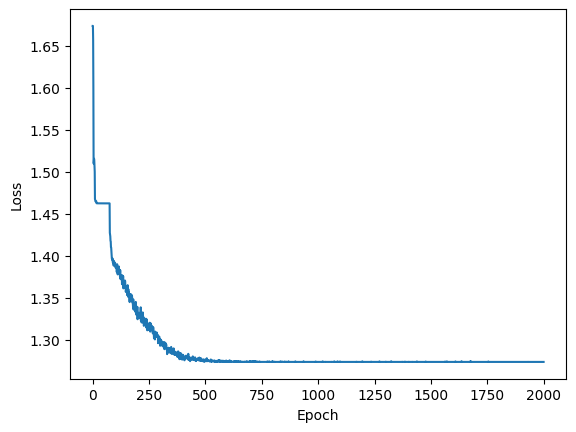

In [13]:
# Define model parameters
args = ModelArgs(
    d_model=24,#when set to 64, the model does not learn
    n_layer=2,
    vocab_size=7,
)

seed = 402
torch.manual_seed(seed)
np.random.seed(seed)

# Initialize the Mamba model
model = Mamba(args)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Define a loss function
loss_fn = nn.CrossEntropyLoss()

# Define an optimizer
optimizer = Adam(model.parameters(), lr=1e-4)

# List to store loss values
loss_values = []

# For each epoch
for epoch in tqdm(range(200001)):
    # Generate data
    inputs, targets = generate_data(batch_size=64)
    inputs = torch.from_numpy(inputs).long().to(device)
    targets = torch.from_numpy(targets).long().to(device)
    outputs = model(inputs)
    outputs = nn.Softmax(dim=2)(outputs)
    loss = loss_fn(outputs.reshape(-1,8), targets.reshape(-1))
    if epoch % 100 == 0:
      loss_values.append(loss.item())  # Store loss value
    if epoch % 5000 == 0:
        print(f'Epoch {epoch}: loss={loss.item()}')

    # Backward pass: compute the gradients of the loss with respect to the model's parameters
    loss.backward()

    # Update the model's parameters
    optimizer.step()

    # Zero the gradients
    optimizer.zero_grad()

# Plot loss values
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
inputs, targets = generate_data(batch_size=1)
inputs = torch.from_numpy(inputs).long()
targets = torch.from_numpy(targets).long()
outputs = model(inputs)
outputs = nn.Softmax(dim=2)(outputs)
print(inputs[0])
print(outputs[0].argmax(dim=1))
print(targets[0])